In [113]:
import numpy as np
import struct

width = 240
height = 180

def load_img(name):
    with open(rf"C:\Users\dmitr\git\srobot\analysis\{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("H", fileContent):
        img[x,y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def zeroToNone(v):
    return v if v > 0 else None

def draw_yline(ax, img, x, label=""):
    y = range(height)
    x1 = [zeroToNone(img[x,height-i-1]) for i in y]
    ax.plot(y, x1, label=f"{label}{x}")

def draw_xline(ax, img, y, label=""):
    x = range(width)
    y1 = [zeroToNone(img[i,height-y-1]) for i in x]
    ax.plot(x, y1, label=f"{label}{y}")

def gaussian_kernel(size):
   x, y = np.mgrid[-size:size+1, -size:size+1]
   g = np.exp(-(x**2/float(size) + y**2/float(size)))
   return g / g.sum()

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)


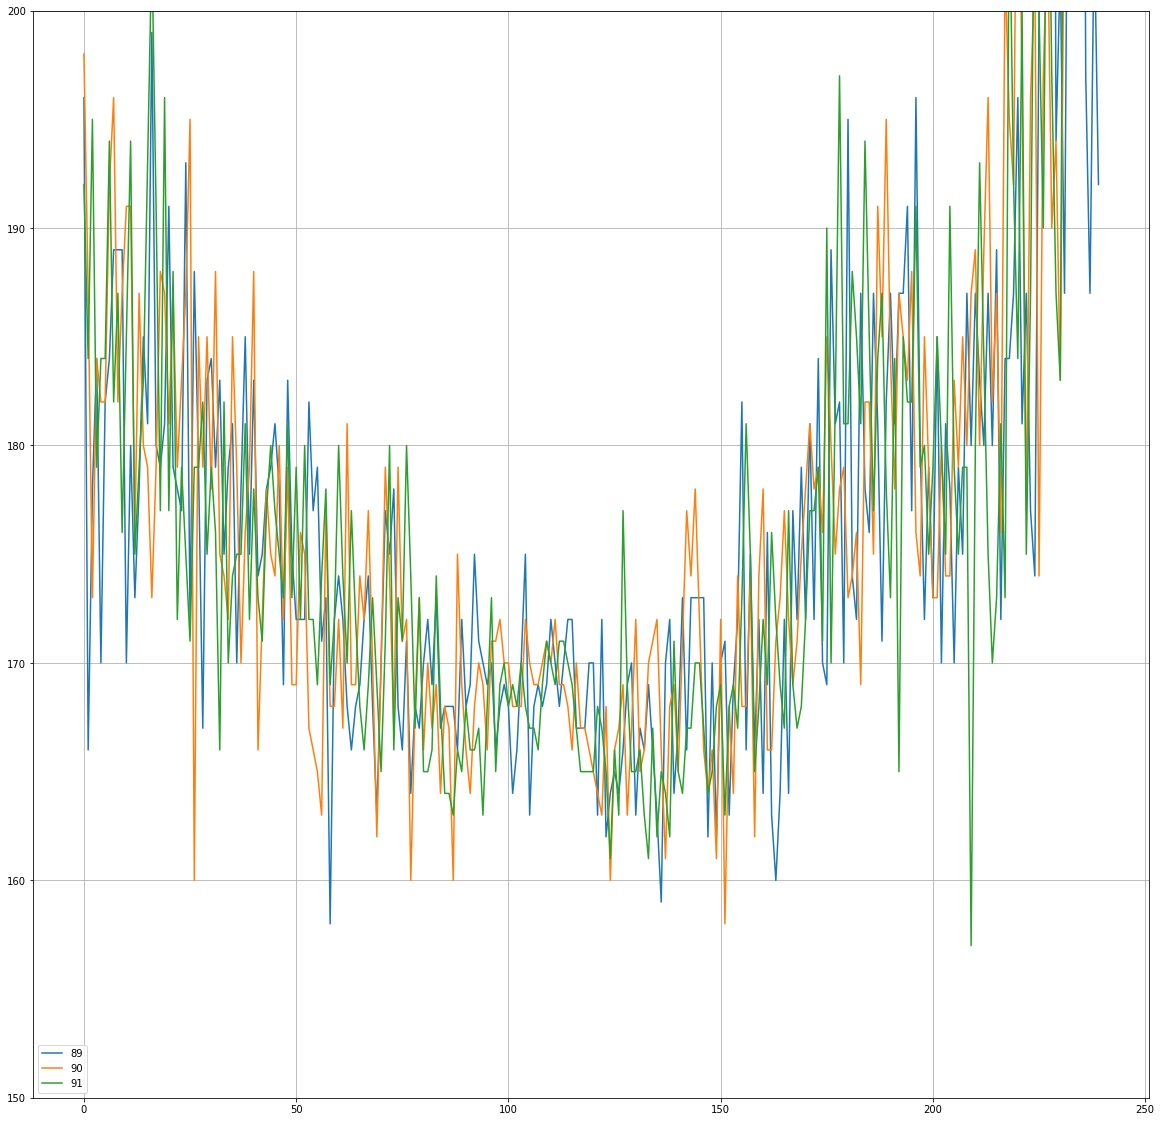

In [35]:
import matplotlib.pyplot as plt

img = load_img("depthwall20")

x = range(width)

plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()


#for y in [10, 90, 170]:
for y in [89,90, 91]:
    y1 = [img[i,y] for i in x]
    ax.plot(x, y1, label=f"{y}")
ax.grid(True)
plt.legend()
ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

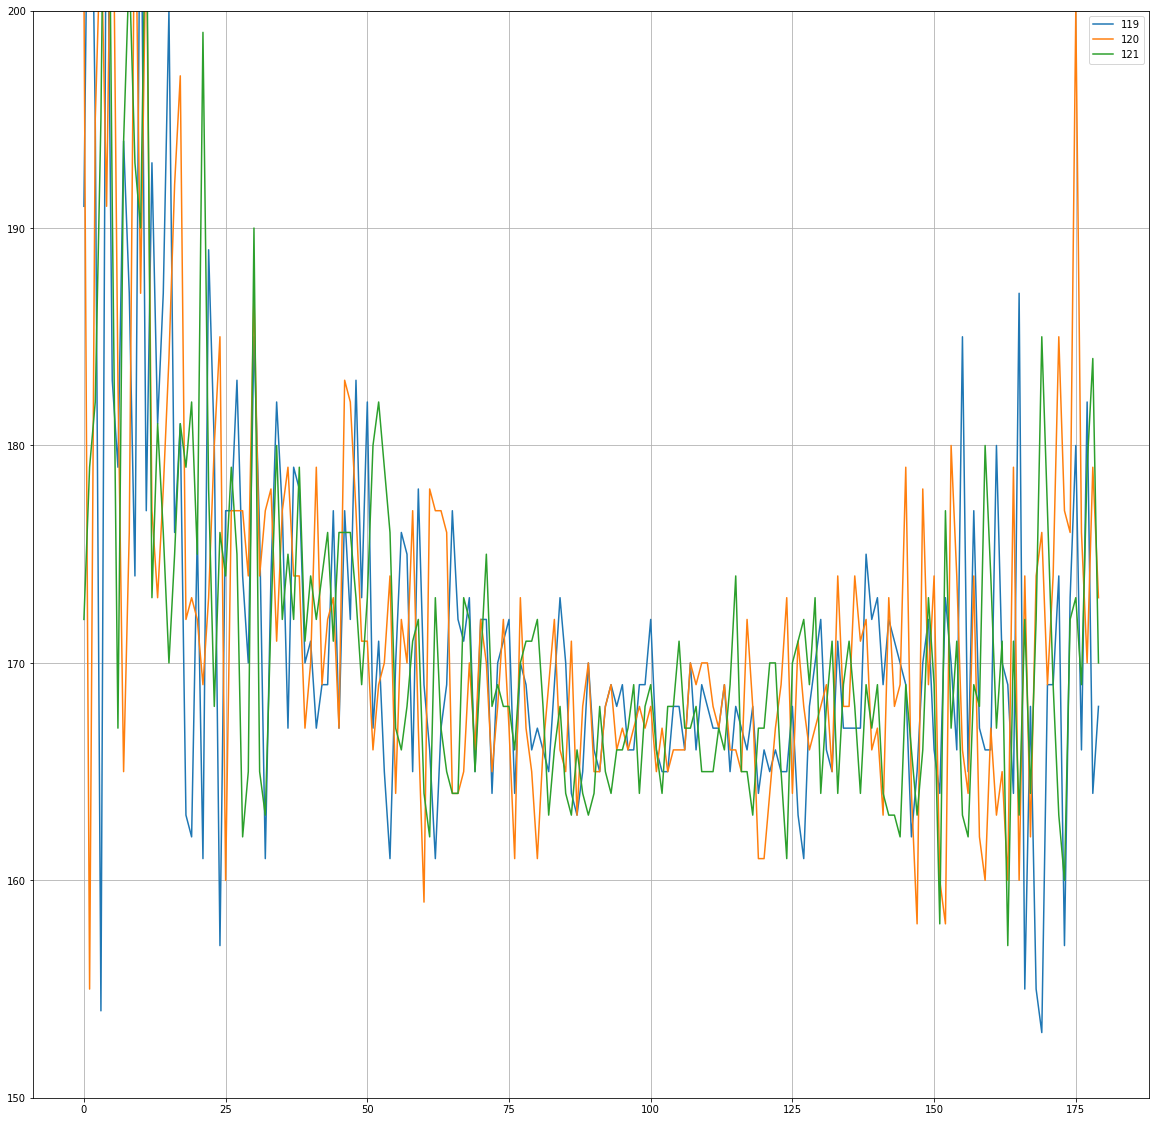

In [27]:
import matplotlib.pyplot as plt

y = range(height)

plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()


#for x in [10, 120, 230]:
for x in [119,120, 121]:
    x1 = [img[x,i] for i in y]
    ax.plot(y, x1, label=f"{x}")
ax.grid(True)
ax.legend()
ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

In [121]:
img_sobj100 = load_img("depth_sobj100")
img_wall150 = load_img("depth_wall150")

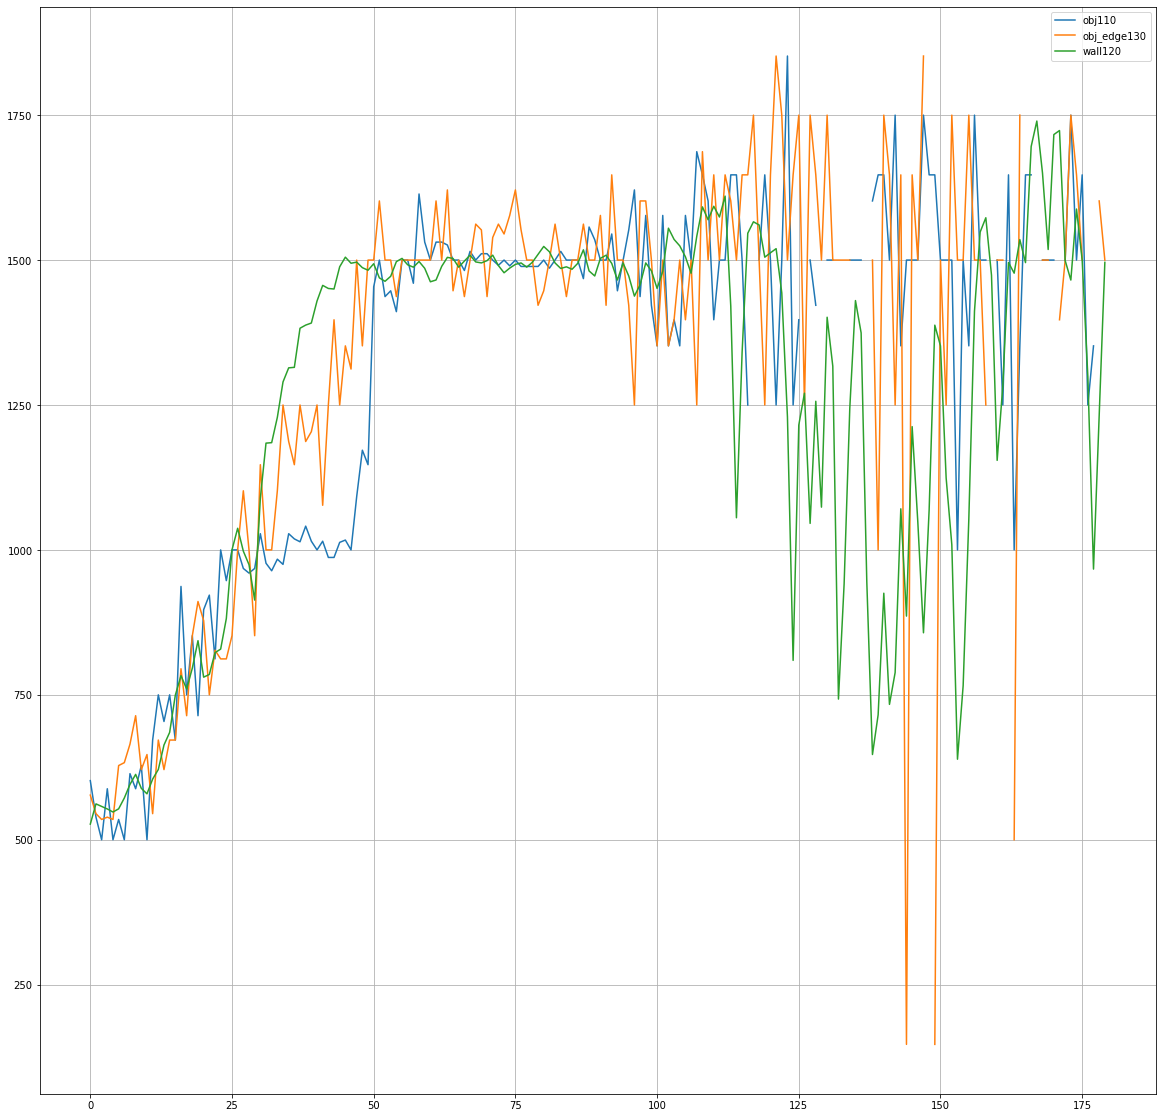

In [73]:
import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()
draw_yline(ax, img_sobj100, 110, "obj")
draw_yline(ax, img_sobj100, 130, "obj_edge")
#draw_yline(ax, img_sobj100, 160, "obj_out")
draw_yline(ax, img_wall150c, 120, "wall")
#draw_yline(ax, img_wall150, 121, "wall")
ax.grid(True)
ax.legend()
#ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

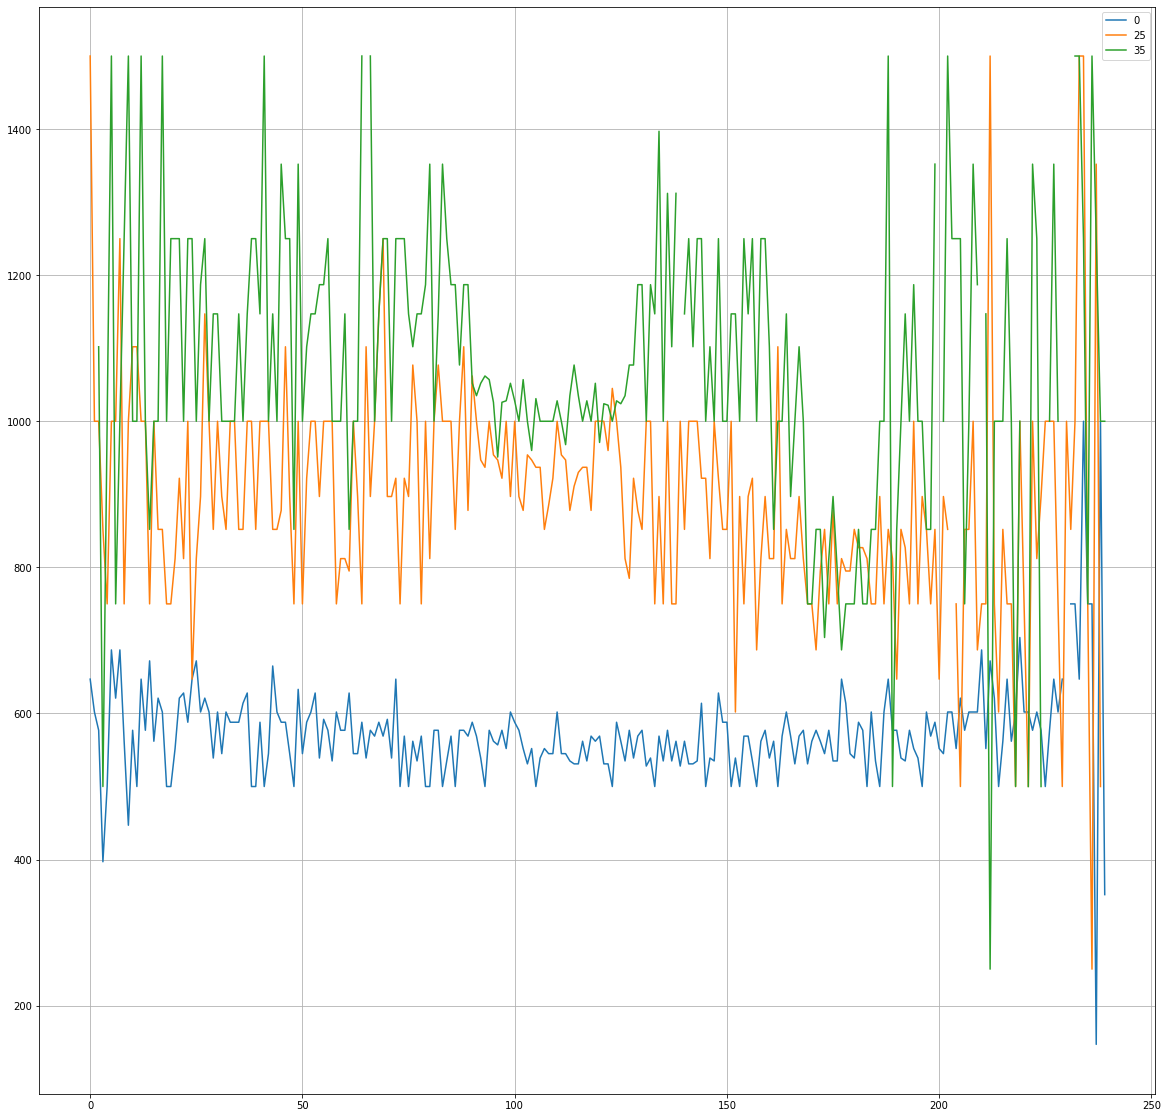

In [57]:
import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()
draw_xline(ax, img_sobj100, 0)
draw_xline(ax, img_sobj100, 25)
draw_xline(ax, img_sobj100, 35)
#draw_yline(ax, img_wall150, 121, "wall")
ax.grid(True)
ax.legend()
#ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

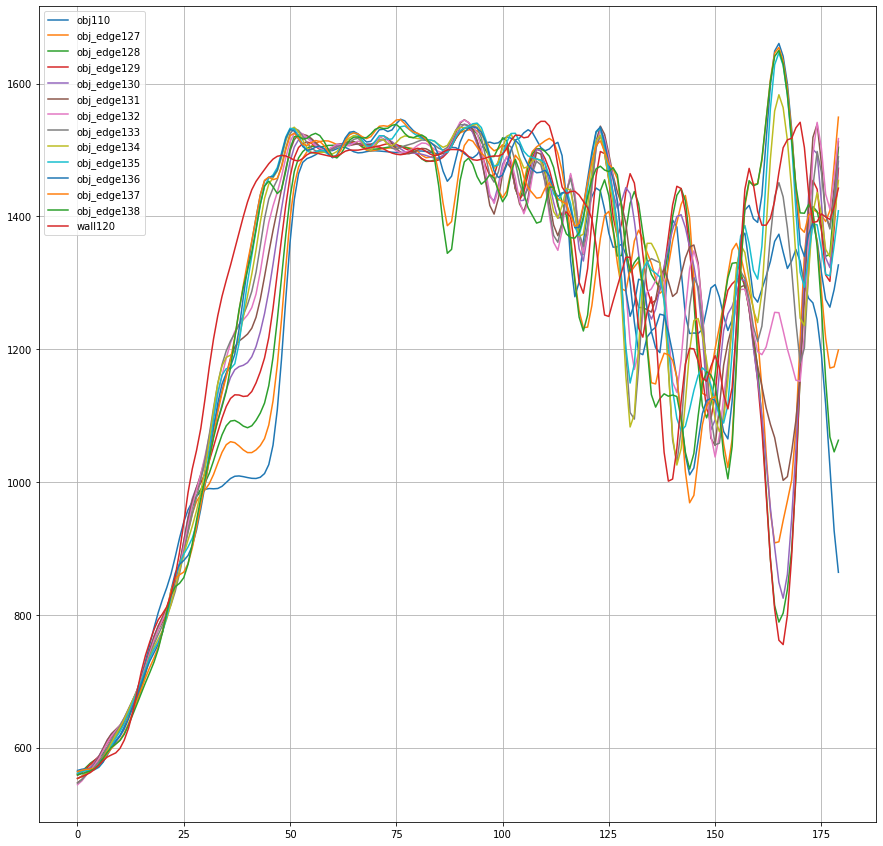

In [189]:
from scipy.ndimage import convolve

kernel_size = 5
c = gaussian_kernel(kernel_size)

img_sobj100c = convolve(img_sobj100, c)
img_wall150c = convolve(img_wall150, c)

import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
draw_yline(ax, img_sobj100c, 110, "obj")
draw_yline(ax, img_sobj100c, 127, "obj_edge")
draw_yline(ax, img_sobj100c, 128, "obj_edge")
draw_yline(ax, img_sobj100c, 129, "obj_edge")
draw_yline(ax, img_sobj100c, 130, "obj_edge")
draw_yline(ax, img_sobj100c, 131, "obj_edge")
draw_yline(ax, img_sobj100c, 132, "obj_edge")
draw_yline(ax, img_sobj100c, 133, "obj_edge")
draw_yline(ax, img_sobj100c, 134, "obj_edge")
draw_yline(ax, img_sobj100c, 135, "obj_edge")
draw_yline(ax, img_sobj100c, 136, "obj_edge")
draw_yline(ax, img_sobj100c, 137, "obj_edge")
draw_yline(ax, img_sobj100c, 138, "obj_edge")
#draw_yline(ax, img_sobj100, 160, "obj_out")
draw_yline(ax, img_wall150c, 120, "wall")
#draw_yline(ax, img_wall150, 121, "wall")


ax.grid(True)
ax.legend()
#ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

In [139]:
#image = getImage(img_sobj100c)
image = getImage(load_img("../test1"))
#image = getImage(load_img("depth_sobj100"))
image.show()
#image.save("test.jpeg")

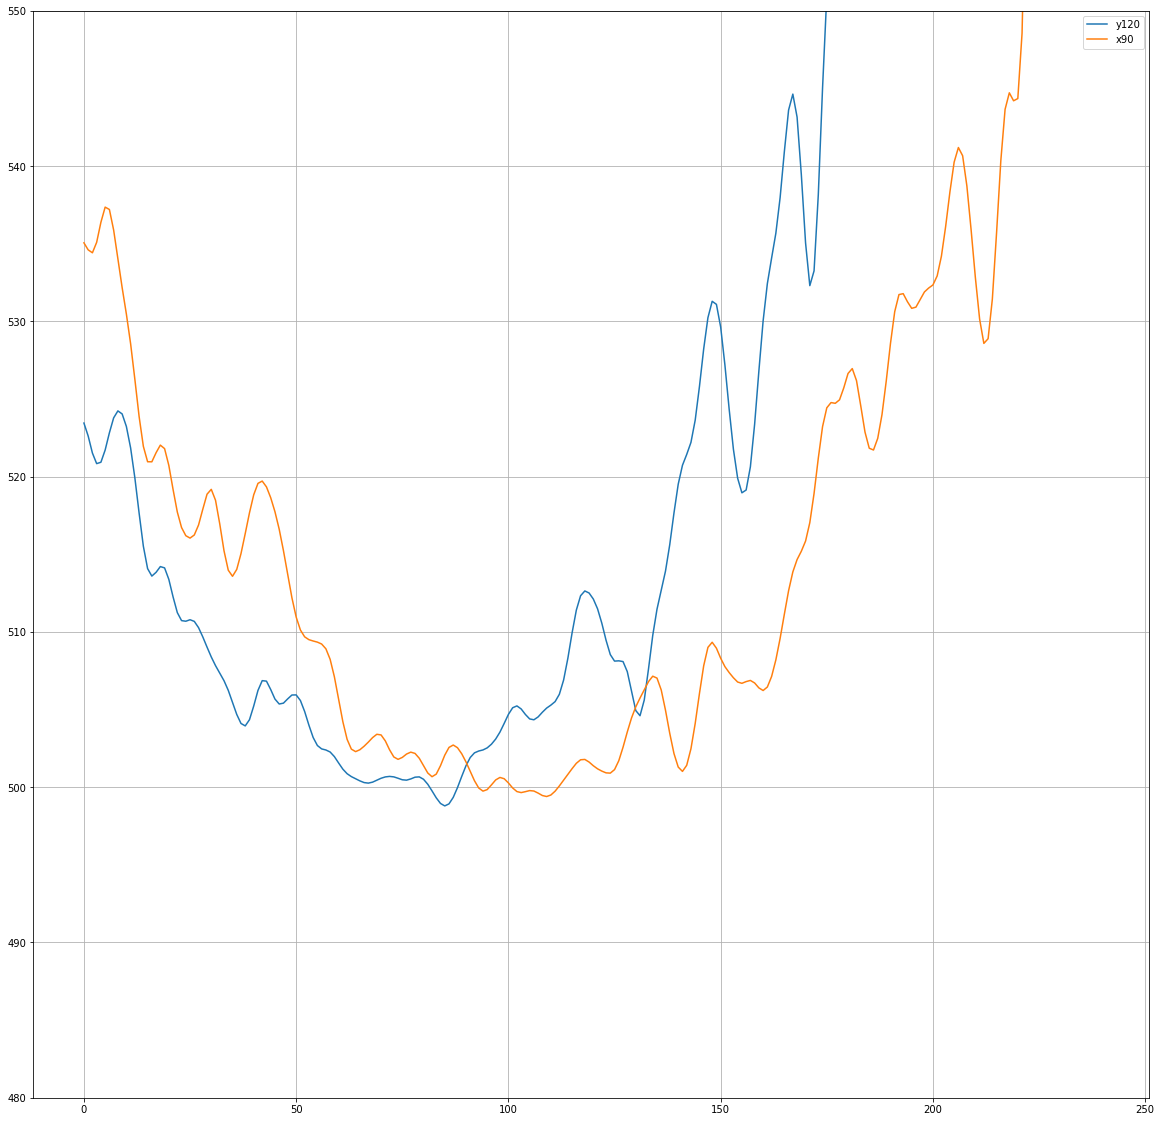

In [144]:
img_wall50 = load_img("depth_wall50")
kernel_size = 10
c = gaussian_kernel(kernel_size)

img_wall50c = convolve(img_wall50, c)

import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()
draw_yline(ax, img_wall50c, 120, "y")
draw_xline(ax, img_wall50c, 90, "x")
ax.grid(True)
ax.legend()
ax.set_ylim(480,550)
#ax.set_xlim(0,80)
    
plt.show()


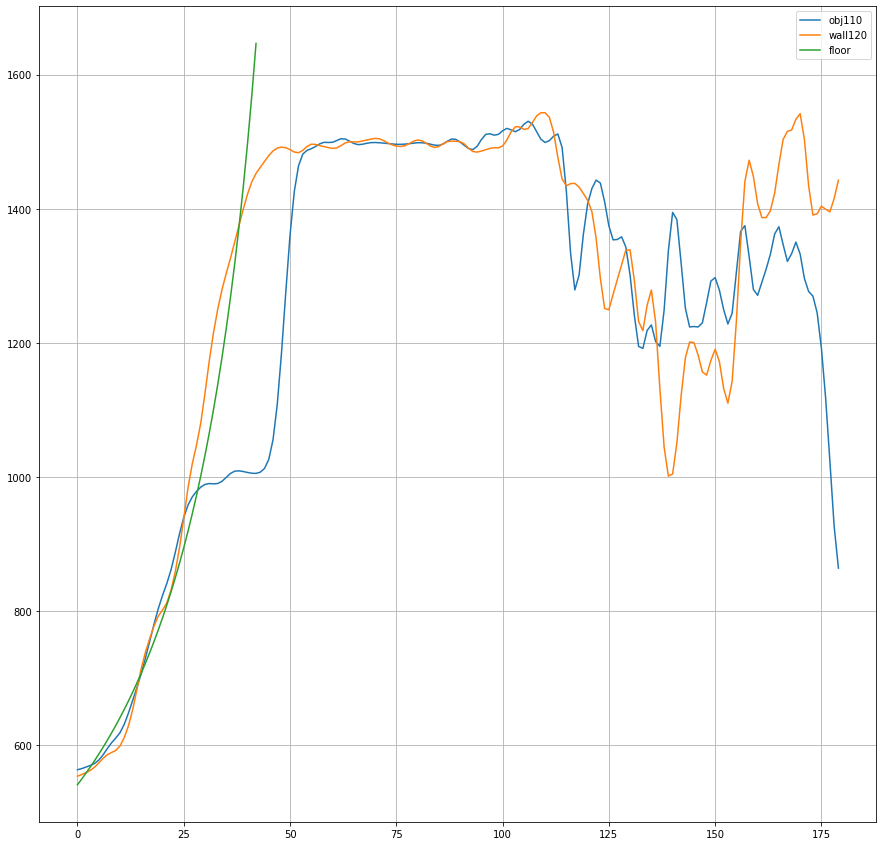

In [188]:
from scipy.ndimage import convolve

kernel_size = 5
c = gaussian_kernel(kernel_size)

img_sobj100c = convolve(img_sobj100, c)
img_wall150c = convolve(img_wall150, c)

import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
draw_yline(ax, img_sobj100c, 110, "obj")
draw_yline(ax, img_wall150c, 120, "wall")


view_angle = 20
center = 62
x = range(int(center * 0.7))
y = []
for i in x:
    #a = (1 - 1.5* i / (height / 2)) * view_angle
    a = (1 - i / center) * view_angle
    y.append(185 / sin(a * pi / 180))
ax.plot(x,y, label="floor")


ax.grid(True)
ax.legend()
#ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

In [152]:
#shortest
185 / sin(20 * pi / 180)

540.9038140301711